Exercicio nº 5
CREMILDO RIBA GOUVEIA DIAS

In this exercise you will use again the dataset in EFIplus_medit.zip to perform some hypothesis testing
1. Test if the frequency of sites with presence and absence of Salmo trutta fario (Brown Trout) are
independent from the country. Please state which is/are the null hypothesis of your test(s).
2. Test whether the means (or medians) of “Actual_river_slope” between presence and absence sites of
Salmo trutta fario (Brown Trout) are equal using an appropriate test. Please state which is/are the null
hypothesis of your test(s).
3. Test whether there are diferences in the mean elevation in the upstream catchment (ELEV_MN_du)
among the four most sampled catchments. For which pairs of catchments are these diferences
significant? Please state which is/are the null hypothesis of your test(s).
4. Which potential problems do you think there are in the data that could limit the conclusions derived
from the performed tests?

In [1]:
# Importar pacotes
import numpy as np
import pandas as pd
import scipy.stats as sts
from scipy.stats import normaltest
import statsmodels.stats as stm
import scikit_posthocs as sp
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importar ficheiro
df1 = pd.read_csv("D:\\avdac\greends-avcd\people\cremildo\EFIplus_medit.zip",compression="zip", sep=";")

In [3]:
print(df1)

       Site_code   Latitude  Longitude   Country Catchment_name  Galiza  \
0     ES_01_0002  38.102003  -4.096070     Spain   Guadalquivir       0   
1     ES_02_0001  40.530188  -1.887796     Spain           Tejo       0   
2     ES_02_0002  40.595432  -1.928079     Spain           Tejo       0   
3     ES_02_0003  40.656184  -1.989831     Spain           Tejo       0   
4     ES_02_0004  40.676402  -2.036274     Spain           Tejo       0   
...          ...        ...        ...       ...            ...     ...   
5006      PTVO60  40.641612  -8.325149  Portugal          Vouga       0   
5007      PTVO61  40.729015  -8.098851  Portugal          Vouga       0   
5008      PTVO62  40.727959  -8.107344  Portugal          Vouga       0   
5009      PTVO63  40.817783  -8.224903  Portugal          Vouga       0   
5010      PTVO64  40.794352  -8.255380  Portugal          Vouga       0   

      Subsample  Calib_EFI_Medit  Calib_connect  Calib_hydrol  ...  \
0             1              

In [4]:
df1.head(5)

,Site_code,Latitude,Longitude,Country,Catchment_name,Galiza,Subsample,Calib_EFI_Medit,Calib_connect,Calib_hydrol,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
0,ES_01_0002,38.102003,-4.096070,Spain,Guadalquivir,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,ES_02_0001,40.530188,-1.887796,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,ES_02_0002,40.595432,-1.928079,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,ES_02_0003,40.656184,-1.989831,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,ES_02_0004,40.676402,-2.036274,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5011 entries, 0 to 5010
Columns: 164 entries, Site_code to Iberochondrostoma_sp
dtypes: float64(38), int64(120), object(6)
memory usage: 6.3+ MB


In [6]:
list(df1.columns)

['Site_code',
 'Latitude',
 'Longitude',
 'Country',
 'Catchment_name',
 'Galiza',
 'Subsample',
 'Calib_EFI_Medit',
 'Calib_connect',
 'Calib_hydrol',
 'Calib_morphol',
 'Calib_wqual',
 'Geomorph1',
 'Geomorph2',
 'Geomorph3',
 'Water_source_type',
 'Flow_regime',
 'Altitude',
 'Geological_typology',
 'Actual_river_slope',
 'Natural_sediment',
 'Elevation_mean_catch',
 'prec_ann_catch',
 'temp_ann',
 'temp_jan',
 'temp_jul',
 'Barriers_catchment_down',
 'Barriers_river_segment_up',
 'Barriers_river_segment_down',
 'Barriers_number_river_segment_up',
 'Barriers_number_river_segment_down',
 'Barriers_distance_river_segment_up',
 'Barriers_distance_river_segment_down',
 'Impoundment',
 'Hydropeaking',
 'Water_abstraction',
 'Hydro_mod',
 'Temperature_impact',
 'Velocity_increase',
 'Reservoir_flushing',
 'Sedimentation',
 'Channelisation',
 'Cross_sec',
 'Instream_habitat',
 'Riparian_vegetation',
 'Embankment',
 'Floodprotection',
 'Floodplain',
 'Toxic_substances',
 'Acidification',
 '

In [15]:
# Number of missing values (NaN) per variable
df1.isnull().sum()

Site_code               0
Latitude                0
Longitude               0
Country                 0
Catchment_name          0
                       ..
Zingel asper            0
Squalius sp             0
Barbatula sp            0
Phoxinus sp             0
Iberochondrostoma_sp    0
Length: 164, dtype: int64

In [7]:
df2 = df1.dropna(how='all') # drops rows when  all elements are missing values
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5011 entries, 0 to 5010
Columns: 164 entries, Site_code to Iberochondrostoma_sp
dtypes: float64(38), int64(120), object(6)
memory usage: 6.3+ MB


In [8]:
df2 = df1.dropna(how='all', axis=1) # drops columns when at least one element is a missing value
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5011 entries, 0 to 5010
Columns: 164 entries, Site_code to Iberochondrostoma_sp
dtypes: float64(38), int64(120), object(6)
memory usage: 6.3+ MB


In [9]:
df2 = df1.dropna() # drops rows when at least one element is a missing value
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2822 entries, 18 to 5010
Columns: 164 entries, Site_code to Iberochondrostoma_sp
dtypes: float64(38), int64(120), object(6)
memory usage: 3.6+ MB


In [10]:
# Check data types
pd.options.display.max_rows = 154 # maximum number of rows displayed.
df2.dtypes

Site_code                object
Latitude                float64
Longitude               float64
Country                  object
Catchment_name           object
                         ...   
Zingel asper              int64
Squalius sp               int64
Barbatula sp              int64
Phoxinus sp               int64
Iberochondrostoma_sp      int64
Length: 164, dtype: object

1. Test if the frequency of sites with presence and absence of Salmo trutta fario (Brown Trout) are independent from the country. Please state which is/are the null hypothesis of your test(s).


In [11]:
#Testando a normalidade da variavel Salmo truta fario
# import function
from scipy.stats import shapiro
stat, p = shapiro(pd.Series(df2["Salmo trutta fario"]))
print('Statistics=%.3f, p=%.3f' % (stat, p)) # print outputs
# interpret. H0: 'the sample was drawn from a Gaussian distribution'.
alpha = 0.05
if p > alpha:
 print('Sample is not significantly different from Gaussian (fail to reject H0. Rejecting H0 has an error probability >0.05)')
else:
 print('Sample is significantly different from Gaussian (reject H0 with an error probability <0.05)')

 # Os dados não seguem distribuição normal, dado que, há evidencias suficientes para rejeitar a hipotese nula.
 #assim sendo será usado o teste não parametrico. 

Statistics=0.559, p=0.000
Sample is significantly different from Gaussian (reject H0 with an error probability <0.05)


In [12]:
# Creating dataset
table_salm = pd.crosstab(df2["Country"],df2["Salmo trutta fario"])
print(table_salm)
len(table_salm)

Salmo trutta fario    0     1
Country                      
Italy                26    25
Portugal            614   252
Spain               140  1765


3

### Tests for categorical variables
#### Chi-Square Test of Independence

H0 - não existe relação entre as frequências de locais com presença e ausência de Salmo truta fario com o País; portanto, são
estatisticamente independentes
HA - existe uma relação significativa entre as frequências de locais com presença e ausência de Salmo truta fario com o País; portanto, são estatisticamente dependentes


In [13]:
#Calculo de ferquencias esperados
import numpy as np

f_11 = 780*51/2822  # Italy/absente
f_12 = 2042*51/2822 # Italy/presente
f_21 = 780*866/2822 # Portugal/absente
f_22 = 2042*866/2822 # Portugal/presente
f_31 = 780*1905/2822 # Spain/absente
f_32 = 2042*1905/2822 #Spain/presente
print(f_11)
print(f_12)
print(f_21)
print(f_22)
print(f_31)
print(f_32)

print(np.square(f_11 - 26)/f_11)

# valor da estatistica
qui_square = np.square(f_11 - 26)/f_11 + np.square(f_12 - 25)/f_12 + np.square(f_21 - 614)/f_21 + np.square(f_22 - 252)/f_22 + np.square(f_31 - 140)/f_31 + np.square(f_32 - 1765)/f_32
print(qui_square)

14.096385542168674
36.903614457831324
239.36215450035436
626.6378454996457
526.541459957477
1378.458540042523
10.051941097724232
1216.3927370383249


In [14]:
# k=(r–1)×(c–1) ; K= quantidade de graus de liberdade; r = quantidade de linhas da tabela; c = quantidade de colunas da tabela
from scipy.stats import chi2
x = 1216.39 # valor da estatistica
k=2
print('valor crítico: %.2f' % chi2.ppf(.95,k))
print('p: %f' % (1 - chi2.cdf(x,k)))
# Dado que o p-value é menor que 0,05 de nivel de significancia, há evidencias suficientes para rejeitar a hipotese nula,
#logo conclui-se que existe uma relação significativa entre as frequências de locais com presença e ausência 
# de Salmo truta fario com o País; portanto, são estatisticamente dependentes


valor crítico: 5.99
p: 0.000000


In [15]:
from scipy.stats import chisquare
chisquare([26, 25, 614, 252, 140, 1765],[14.10, 36.90, 239.36, 626.64, 526.54, 1378.46])

Power_divergenceResult(statistic=1216.393640798267, pvalue=8.259954791165141e-261)

In [16]:
from scipy.stats import chi2_contingency
  
# defining the table
data = [[26, 25, 614, 252, 140, 1765], [14.10, 36.90, 239.36, 626.64, 526.54, 1378.46]]
stat, p, dof, expected = chi2_contingency(data)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 8.561538704025032e-128
Dependent (reject H0)


2. Test whether the means (or medians) of “Actual_river_slope” between presence and absence sites of Salmo trutta fario (Brown Trout) are equal using an appropriate test. Please state which is/are the null hypothesis of your test(s).

In [17]:
# Creating dataset
table1_salm = pd.crosstab(df2["Actual_river_slope"],df2["Salmo trutta fario"])
print(table1_salm)
len(table1_salm)

Salmo trutta fario   0   1
Actual_river_slope        
0.000                3   6
0.001               12   3
0.010               41  15
0.066                0   1
0.100                7   3
...                 ..  ..
159.400              0   1
164.400              0   1
173.400              1   0
225.306              0   1
774.000              0   1

[1511 rows x 2 columns]


1511

In [23]:
dfa = df2[df2['Salmo trutta fario']=='0']
dfb = df2[df2['Salmo trutta fario']=='1']
df2names={'1': dfa, '2': dfb}
farionames = ['0', '1']

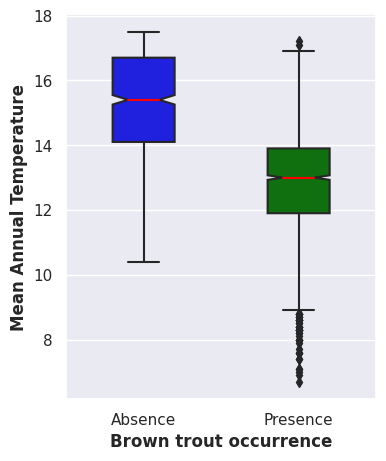

In [24]:
sns.set(rc={'figure.figsize':(4,5)}) 

sns.boxplot(data=df2, x='Salmo trutta fario', y='temp_ann',
        notch=True,
        palette=['blue', 'green'],
        width=0.4,
        medianprops=dict(color="red"),
        ).set_xticklabels(['Absence', 'Presence'])
plt.xlabel('Brown trout occurrence', fontdict={'size': 12, 'weight': 'bold'})
plt.ylabel('Mean Annual Temperature', fontdict={'size': 12, 'weight': 'bold'})

# restore settings
import matplotlib as mpl
mpl.rc_file_defaults()

3. Test whether there are diferences in the mean elevation in the upstream catchment (ELEV_MN_du) among the four most sampled catchments. For which pairs of catchments are these diferences significant? Please state which is/are the null hypothesis of your test(s).

In [26]:
table_catch = pd.crosstab(df2["Elevation_mean_catch"],df2["Catchment_name"])
print(table_catch)
len(table_catch)

Catchment_name        Algarve-Sotavento  Algarve-barlavento  Campania-South  \
Elevation_mean_catch                                                          
52.249944                             0                   0               0   
69.140372                             0                   0               0   
69.625400                             0                   0               0   
72.115571                             0                   0               0   
72.786452                             0                   0               0   
...                                 ...                 ...             ...   
1767.105030                           0                   0               0   
1806.300967                           0                   0               0   
1829.373233                           0                   0               0   
1909.344369                           0                   0               0   
2003.131476                           0             

2280

4. Which potential problems do you think there are in the data that could limit the conclusions derived from the performed tests?